In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import sklearn
from sklearn.datasets import load_boston
bdata = load_boston()

In [4]:
#Explore the dataset
print bdata.keys()
print bdata.feature_names
print bdata.target.shape
print bdata.data.shape
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

In [5]:
import statsmodels.formula.api as smf
#Get the featuresa and create a new dataset including all the new features together
rm = bdata.data[:,5]
rm_square = [i**2 for i in rm]
price = bdata.target
data1 = np.vstack([rm, rm_square, price]).transpose()
data2 = pd.DataFrame(data1).dropna()
data2.columns = ['rm', 'rm_square', 'price']

#Show the relationship between the house price and room numbers
mod_rm = smf.ols(formula = 'price ~ rm',data = data2)
res_rm = mod_rm.fit()

#Get the intercept and slope coefficient
inte_coef1= res_rm.params[0]
slope_coef1 = res_rm.params[1]
print "The intercept coefficient is %f,\nThe slope coefficient is %f"%(inte_coef1, slope_coef1)

The intercept coefficient is -34.670621,
The slope coefficient is 9.102109


### Conclusion:
If we only choose to show the relationship between the house price and room number. The slope coefficeint is 9.1 and positive. That means the room number has a positive influence on the house price. After we add the squared room number to the equation, the relationship is not linear any more. It become a curve. That means the house price is not always up when the room number is more. 

In [8]:
#Show the relationship between the house price and room number and squared room number
mod_rm_square = smf.ols(formula = 'price ~ rm + rm_square',data = data2)
res_rm_square = mod_rm_square.fit()

#Get the intercept and slope coefficients
inte_coef2 = res_rm_square.params[0]
slope_coef2 = res_rm_square.params[1]
slope_coef3 = res_rm_square.params[2]

print "The intercept coefficient is %f;\nThe slope coefficient of rm is %f;\nThe slope coefficient of rm square is %f."%(inte_coef2, slope_coef2,slope_coef3)

The intercept coefficient is 66.058847;
The slope coefficient of rm is -22.643262;
The slope coefficient of rm square is 2.470124.


In [10]:
#import library needed and split the whole dataset as training data set and test dataset. The training dataset will be 66% of the whole dataset
from sklearn import cross_validation
bdata_train, bdata_test, btarget_train, btarget_test = cross_validation.train_test_split(bdata.data, bdata.target, test_size=0.34, random_state=0)
print bdata_train.shape 
print btarget_train.shape
print bdata_test.shape
print btarget_test.shape

(333, 13)
(333,)
(173, 13)
(173,)


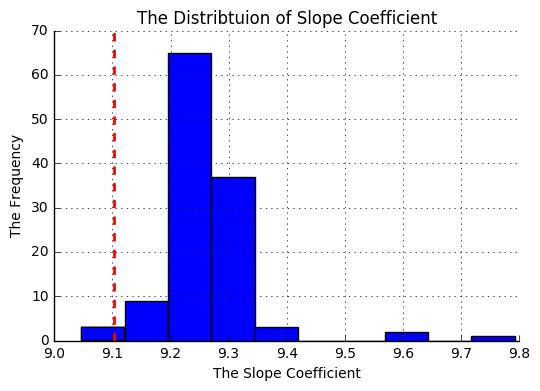

In [12]:
#import Kfold 
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

coef = []
length = len(bdata_train)
k = 120
kf = KFold(length, n_folds=k)
x = bdata_train[:,5:6]
y = btarget_train

    #Splite the dataset to training dataset and test dataset based on K values
for train_index, test_index in kf:
    x_train = x[train_index]
    x_test = x[test_index]
    y_train =y[train_index]
    y_test = y[test_index]
            
    #Call the linear regression function
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    coef.append(lm.coef_[0])

#Import the plot library
%matplotlib inline  
import matplotlib.pyplot as plt  

#Make the graph
plt.hist(coef)

#Add the vertical line to show the slope coefficient value in estimation
plt.axvline(slope_coef1, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('The Slope Coefficient')
plt.ylabel('The Frequency')
plt.title('The Distribtuion of Slope Coefficient')
plt.legend()
plt.grid()
#Remove the right and top axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")

#Add a virtical line to show the value of slope coefficient in the estimation 1:
plt.show()


*Enter your observations here*

When you set the K value as 35 or bigger, the slope coefficient got from full dataset will far from the  median of the slope coefficients got from KFolds.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

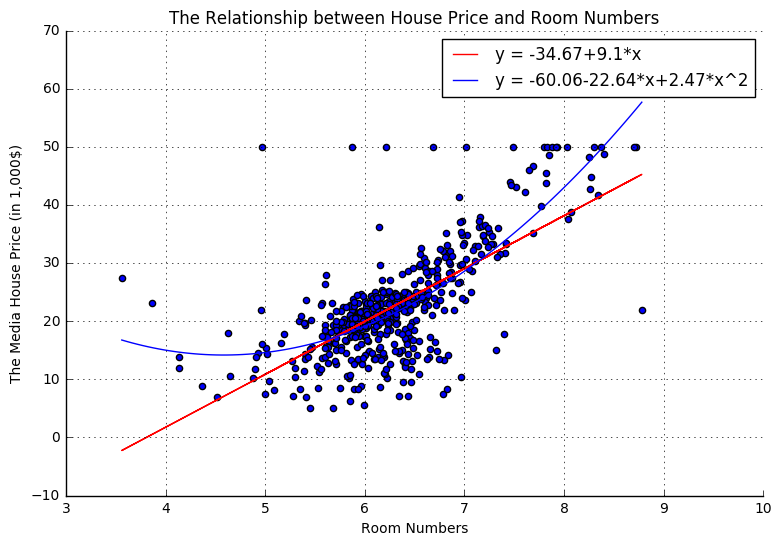

In [13]:
#Set the graph size
plt.figure(figsize=(9,6))
ax = plt.subplot(111)
rm_space = np.linspace(data2.rm.min(), data2.rm.max(), 100)

plt.scatter(rm, price)
plt.plot(rm,inte_coef1 + slope_coef1*rm, '-', color = 'r', label ='y = -34.67+9.1*x')
plt.plot(rm_space, inte_coef2 + slope_coef2*rm_space + slope_coef3*rm_space**2, '-', color = 'b', label='y = -60.06-22.64*x+2.47*x^2')
plt.xlabel('Room Numbers')
plt.ylabel('The Media House Price (in 1,000$)')
plt.title('The Relationship between House Price and Room Numbers')
plt.grid()
plt.legend()

#Remove the right and top axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")


## Gradient descent: Linear Regression

### 2.1 Implement gradient descent with one independent variable (Average rooms per house). It includes parts showing as below:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

In [15]:
"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
import time
start_time = time.time()
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    alpha = 1.0
    beta = 1.0
    mini_cost = 0
    iteration = 1
    m = len(xvalues)
    while iteration <= MaxIterations:
        
        #Calcualte the total loss
        sum_alpha = np.sum(alpha + np.dot(xvalues,beta) - yvalues)
        sum_beta = np.sum((alpha + np.dot(xvalues,beta) - yvalues)*xvalues)
        
        #Get the alpha and beta value for this iteration
        alpha = alpha - R*sum_alpha/m
        beta = beta - R*sum_beta/m
        
        #Calculate the cost value for this iteration
        cost = np.sum((alpha + np.dot(xvalues, beta) - yvalues)**2)/2*m
        
        #Set the trigger
        if np.abs(mini_cost - cost) <= 0.0001:
            return alpha, beta, iteration
            break
        mini_cost = cost
        iteration += 1   
        
        
print bivariate_ols(bdata_train[:,5], btarget_train, 0.03, 100000)
print bivariate_ols(bdata_train[:,5], btarget_train, 0.02, 100000)
print bivariate_ols(bdata_train[:,5], btarget_train, 0.04, 100000)
print bivariate_ols(bdata_train[:,5], btarget_train, 1.20, 100000)
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

(-35.606218005461301, 9.261106950095213, 21615)
(-35.603045828797207, 9.2606106617991255, 31589)
(-35.60811109380424, 9.2614031245166082, 16507)
None
Time taken: 6.04 seconds


Generally speaking, the bigger the R value we choose, the less iterations will be took to find the parameters that can minimize the coss function. But if the R value is too larger, we may miss the right parameters.

### Data normalization

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, however, you should re-scale your features to ensure that no single feature dominates the cost function. Write a simple function to [standardize](http://en.wikipedia.org/wiki/Standard_score) a feature.

In [18]:
def standardize(raw_data):
    #Calcualte the mean and standard deviation of dataset
    normalized_data = raw_data.copy()
    data_mean = np.mean(raw_data, axis = 0)
    data_std = np.std(raw_data, axis = 0)
    
    #Normalized data
    normalized_data = (raw_data - data_mean)/data_std
    return normalized_data

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now it is the time to create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test the algorithm using CRIM and RM as independent variables (and make sure to standardize these features before inputting them to the gradient descent algorithm!).

At the end,  it will report the estimated coefficients, the number of iterations before convergence, and the total running time of the algorithm. Experiment with 2-3 different values of R.

In [21]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""
start_time = time.time()
def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    #Normalize features
    xvalue_matrix = standardize(xvalue_matrix)
    #m,n represent the number of rows and columns
    m,n = xvalue_matrix.shape
    
    #Initialized the value of alpha and beta as 1
    alpha = 1.0
    beta_array = [1.0 for i in range(n)]
    mini_cost = 0
    
    #Set the iteration equals at least 1
    iteration = 1
    while iteration <= MaxIterations:
        #'h' represents the simplified hypothesis
        h = 0
        #iterate all the features and beta
        for i in range(n):
            h += np.dot(xvalue_matrix[:,i],beta_array[i]) 
        
        #Get the alpha value
        sum_alpha = np.sum(alpha + h - yvalues)
        alpha = alpha - R*sum_alpha/m
        
        #Calculate the beta value
        for i in range(n):
            sum_beta = np.sum((alpha + h - yvalues)*xvalue_matrix[:,i])
            beta_array[i] = beta_array[i] - R*sum_beta/m
        
        #Calcualte the cast for this iteration
        cost = np.sum((alpha + h - yvalues)**2)/2*m
        
        #Set the trigger
        if np.abs(mini_cost - cost) <= 0.0001:
            return alpha, beta_array,iteration
            break
        mini_cost = cost
        iteration += 1  
        
        
#Try different R values
(in_coef, sl_coef,iterations) = multivariate_ols(bdata_train[:,(0,5)], btarget_train, R=0.001, MaxIterations=100000)
print "When set R as 0.001:\nThe intercept coefficient is %f;\nThe slope coefficient of crim is %f;\nThe slope coefficient of rm is %f;\nThe iteration is %s.\n"%(in_coef, sl_coef[0],sl_coef[1],iterations)

(in_coef, sl_coef,iterations) = multivariate_ols(bdata_train[:,(0,5)], btarget_train, R=0.06, MaxIterations=100000)
print "When set R as 0.006:\nThe intercept coefficient is %f;\nThe slope coefficient of crim is %f;\nThe slope coefficient of rm is %f;\nThe iteration is %s.\n"%(in_coef, sl_coef[0],sl_coef[1],iterations)

(in_coef, sl_coef,iterations) = multivariate_ols(bdata_train[:,(0,5)], btarget_train, R=0.7, MaxIterations=100000)
print "When set R as 0.7:\nThe intercept coefficient is %f;\nThe slope coefficient of crim is %f;\nThe slope coefficient of rm is %f;\nThe iteration is %s.\n"%(in_coef, sl_coef[0],sl_coef[1],iterations)

(in_coef, sl_coef,iterations) = multivariate_ols(bdata_train[:,(0,5)], btarget_train, R= 1.5, MaxIterations=100000)
print "When set R as 1.5:\nThe intercept coefficient is %f;\nThe slope coefficient of crim is %f;\nThe slope coefficient of rm is %f;\nThe iteration is %s.\n"%(in_coef, sl_coef[0],sl_coef[1],iterations)

print "When set R as 5:",multivariate_ols(bdata_train[:,(0,5)], btarget_train, R= 5, MaxIterations=100000)


When set R as 0.001:
The intercept coefficient is 22.869361;
The slope coefficient of crim is -2.407951;
The slope coefficient of rm is 6.116205;
The iteration is 10083.

When set R as 0.006:
The intercept coefficient is 22.870166;
The slope coefficient of crim is -2.407787;
The slope coefficient of rm is 6.116420;
The iteration is 198.

When set R as 0.7:
The intercept coefficient is 22.870269;
The slope coefficient of crim is -2.407753;
The slope coefficient of rm is 6.116457;
The iteration is 14.

When set R as 1.5:
The intercept coefficient is 22.870270;
The slope coefficient of crim is -2.407721;
The slope coefficient of rm is 6.116438;
The iteration is 48.

When set R as 5: None


Generally speaking, the bigger the R value is, the less iterations and time will be took to find the parameters. But if the R value is too large, it fails to find the right parameters(like the example above when set the R equals to 5). And also if R value is large, it may diverge, that means it takes more time and iterations to find the right parameters.(In the example above, the R =1.5 takes more time and iteration than R=0.7 to find the parameters)

### 2.4. Cross-Validation

Use k-fold cross-validation to fix the overfit problem.

In [23]:
#Calculate the coefficients using cross validation

import time
start_time = time.time()

def calCoef_kFold(k, xdata, ydata, R = 0.01, MaxIteration = 1000):
    intecept_coef = []
    slope_coef = []
    length = len(xdata)
    kf = KFold(length, n_folds=k)
    #Splite the dataset to training dataset and test dataset based on K values
    for train, test in kf:
        x_train = xdata[train]
        x_test = xdata[test]
        y_train = ydata[train]
        y_test = ydata[test]
        
        #Call the grediant descent function
        #Features will be normalized in this function
        a = multivariate_ols(x_train, y_train, R=0.1, MaxIterations=10000)
        
        #Splite the result as intercept coefficient and slope coefficient
        inte_coef = a[0]
        slo_coef = a[1]
        intecept_coef.append(inte_coef)
        slope_coef.append(slo_coef)
   
    #Calculate the average coefficients across the k foles
    intecept_coef = np.mean(intecept_coef, axis = 0)
    slope_coef = np.mean(slope_coef, axis = 0)
    return intecept_coef,slope_coef

#Set kfold = 20
(in_coef, sl_coef) = calCoef_kFold(20, bdata_train[:,(0,5)], btarget_train, R = 0.06, MaxIteration = 10000)
print "The intercept coefficients is %f,\nThe slope coefficient of crim is %f;\nThe slope coefficient of rm is %f:"%(in_coef, sl_coef[0], sl_coef[1])
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The intercept coefficients is 22.870184,
The slope coefficient of crim is -2.406253;
The slope coefficient of rm is 6.115499:
Time taken: 0.13 seconds


In [24]:
#Use the stardard package to get the coefficients
#Normalize features
xtrain = standardize(bdata_train)
CRIM = xtrain[:,0]
RM = xtrain[:,5]
PRICE = btarget_train
data11 = np.vstack([CRIM,RM, PRICE]).transpose()
data22 = pd.DataFrame(data11).dropna()
data22.columns = ['CRIM', 'RM', 'PRICE']

#Show the relationship between the house price and room numbers
mod_rm = smf.ols(formula = 'PRICE ~ CRIM + RM',data = data22)
res_rm = mod_rm.fit()

#Get the intercept and slope coefficient
inte_coef3= res_rm.params[0]
slope_coef_crim = res_rm.params[1]
slope_coef_rm = res_rm.params[2]

print "Intercept coefficient is:", inte_coef3
print "The slope coefficient of crim is %f;\nThe slope coefficient of rm is %f"%(slope_coef_crim, slope_coef_rm)

Intercept coefficient is: 22.8702702703
The slope coefficient of crim is -2.407747;
The slope coefficient of rm is 6.116463


*Discuss your results here*

The estimated coefficients got from cross validation are very similar to those got from 2.3. Compare to the coefficients got form standard package, the coefficients got from cross validation are just very slightly smaller. We using three differenct ways get very similar results.

### 2.5 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

In [27]:
#Function used to calcualte the rmse
def compute_rmse(predictions, yvalues):
    if len(predictions) != len(yvalues):
        return False
    length = len(yvalues)
    sum = 0
    for i in range(length):
        diff = pow((predictions[i] - yvalues[i]),2)
        sum = sum + diff
    rmse = np.sqrt(float(sum)/length)
    return rmse

In [28]:
import time
start_time = time.time()
def calRmse(k, xdata, ydata, R = 0.01, MaxIteration = 1000):
    length = len(xdata)
    kf = KFold(length, n_folds=k)
    RMSE = []
    m,n = xdata.shape
        #Splite the dataset to training dataset and test dataset based on K values
    for train, test in kf:
        x_train = xdata[train]
        x_test = xdata[test]
        y_train =ydata[train]
        y_test = ydata[test]
        
        #Call the grediant descent function
        (inte_coef, slo_coef,iterations) = multivariate_ols(x_train, y_train, R=0.1, MaxIterations=100000)
        
        #Splite the result to intercept coefficient and slope coefficient
        #slo_coef_crim = slo_coef[0]
        #slo_coef_rm = slo_coef[1]
        
        #Use the test dataset to get the prediction values
        predictions = []
        for j in range(len(x_test)):
            y = inte_coef + np.sum(slo_coef[i]*x_test[j,i] for i in range(n))
            predictions.append(y)
        
        #Calculate the rmse:
        rmse = compute_rmse(predictions, y_test)
        RMSE.append(rmse)
        
    #Get the average 'RMSE'    
    avg_rmse = np.mean(RMSE, axis = 0)   
    return avg_rmse

#Normalize features
xdata = standardize(bdata_train)
print "The average RMSE is:",calRmse(5, xdata[:,(0,5)], btarget_train, R = 0.01, MaxIteration = 1000)
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The average RMSE is: 6.14746405352
Time taken: 0.03 seconds


*Discuss your results here*

By using the same features(RM and CRIM), the RMSE got from nearest neighbor is about 7.37, while the RMSE got from cross validation is about 6.15. The cross validation can get smaller RMSE than the nearest neighber. The cross validation is a better way to optimize the model. 

### Logistic Regression
Implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [32]:
#Create new variable "EXPENSIVE"
m = bdata.target.copy()
EXPENSIVE = []
for i in m:
    if i <= 40:
        i = 0
        EXPENSIVE.append(i)
    else:
        i = 1
        EXPENSIVE.append(i)

*Discuss your results here*

## 3 Regularization 

### 3.1 Get prepped

Step 1: For each of the continuous features F in the original dataset, create a scaled version F_s.  Now, create three more transformations of F_s: the natural log of F_s (call this F_ln); the square of F_s (call this F_2); the cube of F_s (call this F_3). If you originally had *K* features, you should now have *4K* features corresponding to F_s, F_ln, F_2, and F_3 (i.e., we're going to ignore the original unscaled features for the remainder of this problem).

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [33]:
import time
start_time = time.time()
#As the 'CHAS' is not a continuous feature. We need to remove the 'CHAS'
b = bdata.data[:,:3]
a = bdata.data[:,4:]
new_data = np.hstack([b,a])

#Normalize the dataset:
new_data = standardize(new_data)

#Generate new features
m,n = new_data.shape
ini_data = new_data[:,0]
#Iterate all the features in the original dataset
for i in range(n):
    f_s = new_data[:,i]
    f_2 = np.power(f_s,2)
    f_3 = np.power(f_s,3)
        
    #stack the new features to generate a new dataset
    ini_data = np.vstack([ini_data, f_s])
    ini_data = np.vstack([ini_data, f_2])
    ini_data = np.vstack([ini_data, f_3])
        
#remove the initiliaed data(the first row of the new dataset)
newFeatures = ini_data[1:,:]
    
#transpose the dataset
newFeatures = newFeatures.transpose()
print newFeatures.shape
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

(506, 36)
Time taken: 0.0 seconds


In [34]:
#Split the new featured dataset to training dataset and test dataset
nfeature_train, nfeature_test, ntarget_train, ntarget_test = cross_validation.train_test_split(newFeatures, bdata.target, test_size=0.34, random_state=0)
print nfeature_train.shape 
print nfeature_test.shape
print ntarget_train.shape
print ntarget_test.shape

(333, 36)
(173, 36)
(333,)
(173,)


### 3.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *4K* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 2.5 and nearest neighbors?

In [36]:
#Calculate the RMSE for training and testing datasets
#####################################

def calRMSE(xtrain, xtest, ytrain, ytest, R = 0.1, MaxIterations = 100000):
    (i_coef, s_coef, iterations) = multivariate_ols(xtrain, ytrain, R=0.1, MaxIterations=100000)
    pre_test = []
    pre_train = []
    m, n = xtrain.shape
    for j in range(m):
        train_y = i_coef + np.sum(s_coef[i]*xtrain[j,i] for i in range(n))
        pre_train.append(train_y)
    for j in range(len(xtest)):
        test_y = i_coef + np.sum(s_coef[i]*xtest[j,i]for i in range(n))
        pre_test.append(test_y)
    rmse_train = compute_rmse(pre_train, ytrain)
    rmse_test = compute_rmse(pre_test, ytest)
    #print len(ytrain)
    return rmse_train, rmse_test


#Normolize featurs
xtrain = standardize(nfeature_train)
xtest = standardize(nfeature_test)

#Choose 6 features to calculate
x1 = xtrain[:,9:15]
x2 = xtest[:,9:15]

#print calRMSE(x1, x2, ntarget_train, ntarget_test, R = 0.1, MaxIterations = 100000)
(rmse_train, rmse_test)= calRMSE(x1, x2, ntarget_train, ntarget_test, R = 0.1, MaxIterations = 100000)
print "RMSE in training dataset is:", rmse_train
print "RMSE in testing dataset is:", rmse_test

RMSE in training dataset is: 5.22819331421
RMSE in testing dataset is: 5.79514994991


In [38]:
#Get the RMSE using cross validation
################################################
print "The average RMSE from cross validation is:",calRmse(30, x1, ntarget_train, R = 0.1, MaxIteration = 1000)

The average RMSE from cross validation is: 5.04723142435


In [40]:
#Calcualte the RMSE from nearest neighbor
###############################################

#Step1: create the distance function
def calDistance(x1, x2, l):
    if len(x1) < len(x2):
        length = len(x1)
    else:
        length = len(x2)
    dist = 0
    for i in range(length):
        diff = np.abs(x1[i]-x2[i])**l
        dist += pow(diff, 1.0/l)
    return dist
#Step 2 calculate the rmse
def cal_knn_rmse(xtrain, ytrain, xtest, ytest, L):
    dist = []
    l = []
    m,n = xtrain.shape
    for i in range(len(xtest)):
        for j in range(len(xtrain)):
            dis = calDistance([xtest[i,m]for m in range(n)], [xtrain[j,m]for m in range(n)], L)
            dist.append((i, dis, ytrain[j]))
    sorted_dist = sorted(dist)
    
    for i in range(0, len(sorted_dist), len(xtrain)):
        l.append(sorted_dist[i])
    
    p_y = [row[2] for row in l]
    #print len(p_y)
    rmse = compute_rmse(p_y, ytest)
    return rmse

#Use the same features to calculate the RMSE for nearest neighbor
print "The RMSE for nearest neighbor is:",cal_knn_rmse(x1, ntarget_train, x2, ntarget_test, 3)

The RMSE for nearest neighbor is: 7.15319565596


*Discuss results here*

I applied the same feature(6 features) in linear regression and calculated the RMSE using different methods. From the results, we can see that using cross validation can get the smallest RMSE. And the nearest neighbor get the largest one. The RMSE in the training dataset is samller than the RMSE in the testing dataset. That means it may be overfitted in the training dataset.

### 3.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 3.2,  to the RMSE from 2.5, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [43]:
def multivariate_ols_ridge(xvalue_matrix, yvalues, R=0.01, ini_lambda = 1.0, MaxIterations=1000):
    #Normalize features
    xvalue_matrix = standardize(xvalue_matrix)
    
    #m,n represent the number of rows and columns
    m,n = xvalue_matrix.shape
    
    #Initialized the value of alpha and beta as 1
    alpha = 1.0
    beta_array = [1.0 for i in range(n)]
    mini_cost = 0
    
    #Set the iteration equals at least 1
    iteration = 1
    while iteration <= MaxIterations:
        #'h' represents the simplified hypothesis
        h = 0
        #iterate all the features and beta
        for i in range(n):
            h += np.dot(xvalue_matrix[:,i],beta_array[i]) 
        
        #Get the alpha value
        sum_alpha = np.sum(alpha + h - yvalues)
        alpha = alpha - R*sum_alpha/m
        
        #Calculate the beta value
        for i in range(n):
            sum_beta = np.sum((alpha + h - yvalues)*xvalue_matrix[:,i])
            beta_array[i] = beta_array[i]*(1-ini_lambda/m) - R*sum_beta/m
        
        #Calcualte the cast for this iteration
        cost = np.sum((alpha + h - yvalues)**2)/2*m + ini_lambda*np.sum([i**2 for i in beta_array])
        
        #Set the trigger
        if np.abs(mini_cost - cost) <= 0.0001:
            return alpha, beta_array,iteration
            break
        mini_cost = cost
        iteration += 1   

In [44]:
start_time = time.time()
#Try different lambdas:
#Set lambda equals to 0.5
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 0.5, MaxIterations=10000)
pre_test = []
pre_train = []

m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 5.49364206006
The RMSE for testing dataset is: 5.78393702364
Time taken: 0.81 seconds


In [32]:
start_time = time.time()
#Try different lambdas:
#Set lambda equals to 1.0
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 1.0, MaxIterations=10000)
pre_test = []
pre_train = []
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 5.72524286986
The RMSE for testing dataset is: 5.88434577312
Time taken: 0.51 seconds


In [33]:
#Try different lambdas:
#Set lambda equals to 1.5
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 1.5, MaxIterations=10000)
pre_test = []
pre_train = []
h_train = 0
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 5.91454200657
The RMSE for testing dataset is: 5.99011600846
Time taken: 0.37 seconds


In [34]:
#Try different lambdas:
#Set lambda equals to 5.5
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 5.5, MaxIterations=10000)
pre_test = []
pre_train = []
h_train = 0
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 6.85882475626
The RMSE for testing dataset is: 6.69518036814
Time taken: 0.16 seconds


In [35]:
#Try different lambdas:
#Set lambda equals to 10.5
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 10.5, MaxIterations=10000)
pre_test = []
pre_train = []
h_train = 0
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 7.48163239424
The RMSE for testing dataset is: 7.24029215802
Time taken: 0.16 seconds


In [36]:
#Try different lambdas:
#Set lambda equals to 30
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 30.0, MaxIterations=10000)
pre_test = []
pre_train = []
h_train = 0
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 8.39389357287
The RMSE for testing dataset is: 8.08490563668
Time taken: 0.16 seconds


In [37]:
#Try different lambdas:
#Set lambda equals to 105.5
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 105.5, MaxIterations=10000)
pre_test = []
pre_train = []
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 8.99906995738
The RMSE for testing dataset is: 8.66164368398
Time taken: 0.17 seconds


In [38]:
#Try different lambdas:
#Set lambda equals to 355.5
start_time = time.time()
(i_coef, s_coef, iterations) = multivariate_ols_ridge(x1, ntarget_train, R=0.01, ini_lambda = 355.5, MaxIterations=10000)
pre_test = []
pre_train = []
m, n = x1.shape
for j in range(m):
    train_y = i_coef + np.sum(s_coef[i]*x1[j,i] for i in range(n))
    pre_train.append(train_y)
for j in range(len(xtest)):
    test_y = i_coef + np.sum(s_coef[i]*x2[j,i]for i in range(n))
    pre_test.append(test_y)
rmse_train = compute_rmse(pre_train, ntarget_train)
rmse_test = compute_rmse(pre_test, ntarget_test)
#print len(ytrain)
print "The RMSE for training dataset is:",rmse_train
print "The RMSE for testing dataset is:",rmse_test
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The RMSE for training dataset is: 9.21368381679
The RMSE for testing dataset is: 8.86822314301
Time taken: 0.16 seconds


#### *Discuss your results here*

With the different values of lambda, the RMSE is different. The bigger the lambda value is, the bigger RMSE will get. Compare to the RMSE from 3.2, we can see that using cross validation can get the smallest RMSE. Still the nearest neighbor get the largest RMSE. The RMSEs in the training and testing dataset are very similar to those got from 3.2 when the lambda value is small. The RMSE in the training dataset is bigger than the RMSE in the testing dataset when the model use the same value of lambda. 

### Extra Credit: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from 3.2-3.3, to the RMSE from 2.5, and to the RMSE from nearest neighbors?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [39]:
import time
start_time = time.time()
p = 1.0
def cross_lambda(k, xdata, ydata, R = 0.01, ini_lambda= p, MaxIterations = 10000):
    length = len(xdata)
    kf = KFold(length, n_folds=k)
    RMSE = []
    m,n = xdata.shape
    #Splite the dataset to training dataset and test dataset based on K values
    for train, test in kf:
        x_train = xdata[train]
        x_test = xdata[test]
        y_train =ydata[train]
        y_test = ydata[test]
        
        #Call the grediant descent function
        (inte_coef, slo_coef,iterations) = multivariate_ols_ridge(x_train, y_train, R=0.01, ini_lambda = p, MaxIterations=10000)
        
        #Use the test dataset to get the prediction values
        predictions = []
        for j in range(len(x_test)):
            y = inte_coef + np.sum(slo_coef[i]*x_test[j,i] for i in range(n))
            predictions.append(y)
        
        #Calculate the rmse:
        rmse = compute_rmse(predictions, y_test)
        RMSE.append(rmse)
        
    #Get the average 'RMSE'    
    avg_rmse = np.mean(RMSE, axis = 0)   
    return avg_rmse


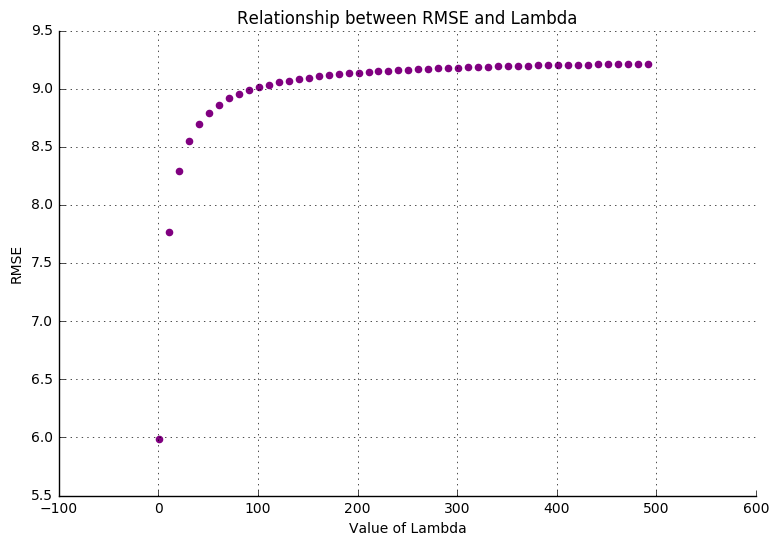

Time taken: 35.04 seconds


In [40]:
start_time = time.time()
#Normalize features
d = {}
lam = [np.float(i) for i in range(1,500,10)]
for p in lam:
    RMSE = cross_lambda(5, x1, ntarget_train, R = 0.01, ini_lambda = p, MaxIterations = 10000)
    d[p] = RMSE
#Make a graph to show the pattern of RMSE and k-value
v_lambda = [key for key in d]
rmse = [d[key] for key in d ]

#make a plot
plt.figure(figsize=(9,6))
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")
#Change the color of the bars to be green and change the bin width to be $1000
plt.scatter(v_lambda, rmse, color = 'purple')
#Add x and y labels
plt.ylabel("RMSE")
plt.xlabel("Value of Lambda")
plt.title('Relationship between RMSE and Lambda')  
plt.grid()  
plt.show()
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

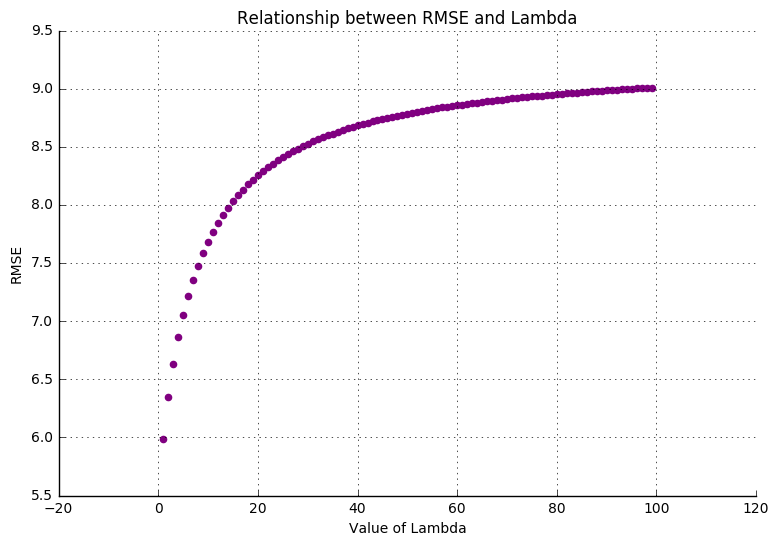

Time taken: 67.95 seconds


In [41]:
start_time = time.time()
d = {}
lam = [np.float(i) for i in range(1,100,1)]
for p in lam:
    RMSE = cross_lambda(5, x1, ntarget_train, R = 0.01, ini_lambda = p, MaxIterations = 10000)
    d[p] = RMSE
    
#Make a graph to show the pattern of RMSE and k-value
v_lambda = [key for key in d]
rmse = [d[key] for key in d ]

#Make a plot
plt.figure(figsize=(9,6))
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")
#Change the color of the bars to be green and change the bin width to be $1000
plt.scatter(v_lambda, rmse, color = 'purple')
#Add x and y labels
plt.ylabel("RMSE")
plt.xlabel("Value of Lambda")
plt.title('Relationship between RMSE and Lambda')  
plt.grid()  
plt.show()
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

*Discuss your results here*

I made two graphs to show the relationship between the value of lambda and RMSE. In the first one, the value of lambda has a broad range(from 1 to 500 with a step of 10). In the sencod graph, I zoomed in the value of lambda to within 100. From the graphs, we can see that, when the value of lambda grow up, the RMSE also becomes bigger. The best choice of lambda is 0 from the result.

### Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

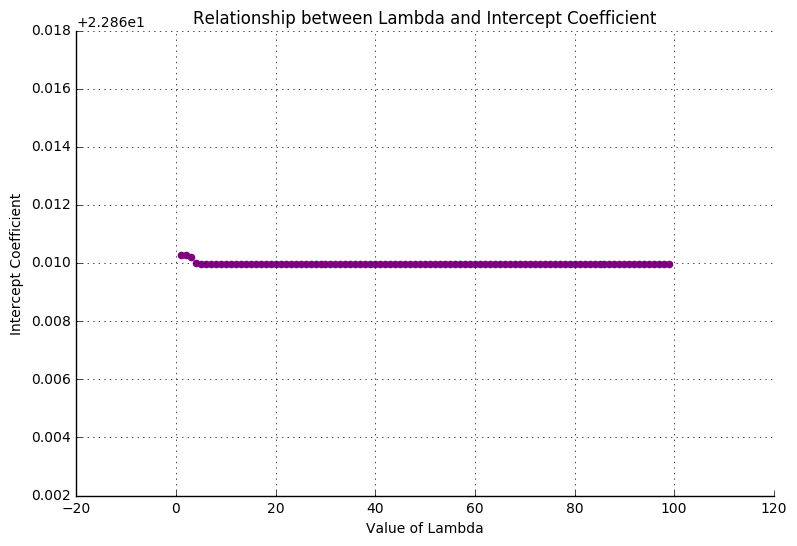

Time taken: 13.07 seconds


In [42]:
start_time = time.time()
# Your code here
x = standardize(bdata_train)
x = x[:,:5]

d = {}
lam = [np.float(i) for i in range(1,100,1)]
for p in lam:
    (in_coef, sl_coef, iterations) = multivariate_ols_ridge(x, btarget_train, R=0.01, ini_lambda = p, MaxIterations=10000)
    d[p] = in_coef
#Make a graph to show the pattern of RMSE and k-value
v_lambda = [key for key in d]
in_coef = [d[key] for key in d ]

#Make a plot
plt.figure(figsize=(9,6))
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")
#Change the color of the bars to be green and change the bin width to be $1000
plt.scatter(v_lambda, in_coef, color = 'purple')
#Add x and y labels
plt.ylabel("Intercept Coefficient")
plt.xlabel("Value of Lambda")
plt.title('Relationship between Lambda and Intercept Coefficient')  
plt.grid()  
plt.show()
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

The graph above shows the relationship between the value of lambda and intercept coefficient. From the result, we can see that the value of lambda doesn't have a big effect on the slope coefficient.

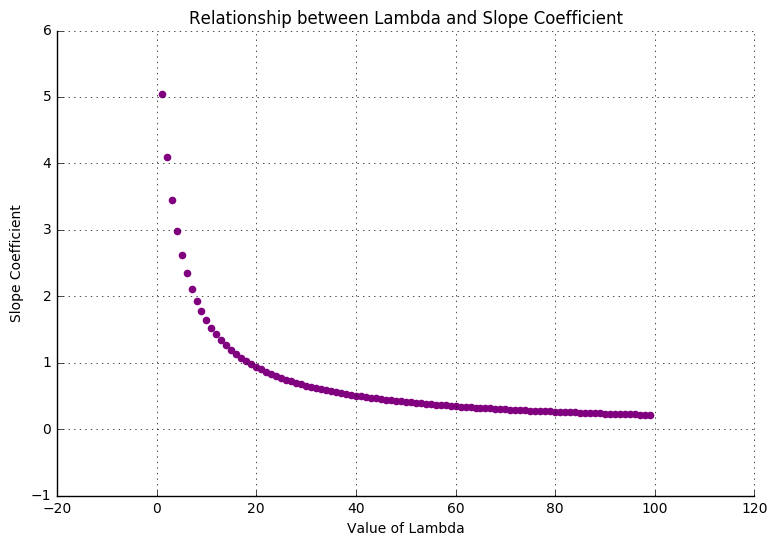

Time taken: 5.44 seconds


In [43]:
start_time = time.time()
#Normalize features
x = standardize(bdata_train)
x = x[:,5:6]

d = {}
lam = [np.float(i) for i in range(1,100,1)]
for p in lam:
    (in_coef, sl_coef, iterations) = multivariate_ols_ridge(x, btarget_train, R=0.01, ini_lambda = p, MaxIterations=10000)
    d[p] = sl_coef
#Make a graph to show the pattern of RMSE and k-value
v_lambda = [key for key in d]
sl_coef = [d[key] for key in d ]

#Make a plot
plt.figure(figsize=(9,6))
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(top = "off", right = "off")
#Change the color of the bars to be green and change the bin width to be $1000
plt.scatter(v_lambda, sl_coef, color = 'purple')
#Add x and y labels
plt.ylabel("Slope Coefficient")
plt.xlabel("Value of Lambda")
plt.title('Relationship between Lambda and Slope Coefficient')  
plt.grid()  
plt.show()
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"

*Discuss your results here*

The seconde graph shows the relationship between the value of lambda and slope coefficients. From the result, we can see that the slope coefficient goes down when the value of lambda goes up. 